In [1]:
%matplotlib inline


# PyTorch: Control Flow + Weight Sharing

To showcase the power of PyTorch dynamic graphs, we will implement a very strange
model: a third-fifth order polynomial that on each forward pass
chooses a random number between 4 and 5 and uses that many orders, reusing
the same weights multiple times to compute the fourth and fifth order.


In [2]:
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 926.768798828125
3999 427.30230712890625
5999 193.6759490966797
7999 92.322021484375
9999 46.245670318603516
11999 25.865549087524414
13999 16.747726440429688
15999 12.258294105529785
17999 10.392138481140137
19999 9.55093765258789
21999 9.205181121826172
23999 8.77193832397461
25999 8.633733749389648
27999 8.858407974243164
29999 8.869880676269531
Result: y = 0.0037201368249952793 + 0.8549396991729736 x + -0.0012490088120102882 x^2 + -0.09344660490751266 x^3 + 0.0001160817701020278 x^4 ? + 0.0001160817701020278 x^5 ?


In [3]:
import matplotlib.pyplot as plt

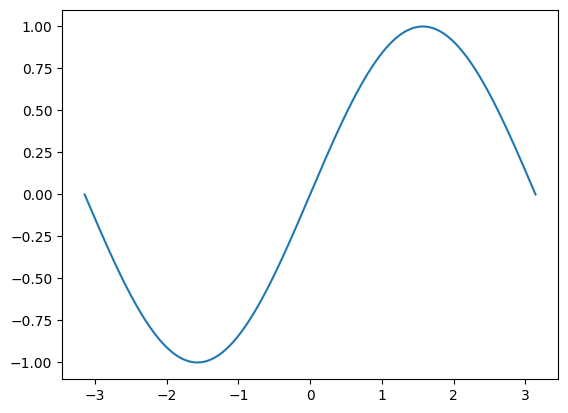

In [9]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
plt.plot(x, y)

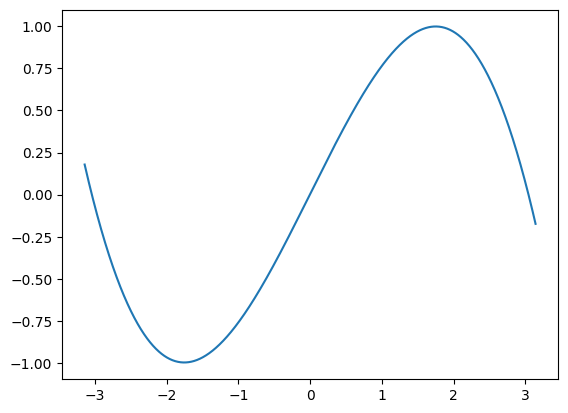

In [15]:
y_pred = model(x).detach()
y_pred
plt.plot(x, y_pred)